# Final Project: Finding a Quiet Place to Live

## By Billy Cole

My project is the columination of my need to find a quiet residential neighborhood in NYC. Which happens to be a very difficult feat. Incorperating the 311 data that is open to all from [Open Data](https://opendata.cityofnewyork.us/).

I tried to use the entire year with from the database, the file ended up being massive **(1+ gigs)** so I instead utilized the April of 2017 and April of 2016. 


In [1]:
import numpy as np
import pandas as pd
import datetime
import json
import urllib.request
import seaborn as sns
import open311SNSL
from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
%matplotlib inline

In open311


##### Relational Data Base:

In [2]:
noise417 = pd.read_csv('https://raw.githubusercontent.com/WilliamJCole/IS362_Final_Project/master/Noise_Complaints_April_2017.csv',sep=',')
noise417

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location
0,35835573,4/1/17 0:01,4/1/17 0:28,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10467.0,07 BRONX,BRONX,1018412.0,259598.0,40.879145,-73.876464,"(40.879144669133176, -73.87646438522717)"
1,35838142,4/1/17 0:04,4/1/17 0:12,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10455.0,01 BRONX,BRONX,1010131.0,236205.0,40.814966,-73.906500,"(40.81496598157052, -73.90650015950133)"
2,35833590,4/1/17 0:05,4/1/17 9:37,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11101.0,02 QUEENS,QUEENS,995645.0,210208.0,40.743642,-73.958878,"(40.74364166035955, -73.95887755839249)"
3,35834330,4/1/17 0:05,4/1/17 8:49,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11226.0,14 BROOKLYN,BROOKLYN,995665.0,175149.0,40.647413,-73.958865,"(40.64741283883138, -73.9588647959135)"
4,35838814,4/1/17 0:05,4/1/17 4:55,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10003.0,06 MANHATTAN,MANHATTAN,989682.0,206744.0,40.734140,-73.980400,"(40.73413951274722, -73.98039971548371)"
5,35838072,4/1/17 0:06,4/1/17 1:26,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,05 MANHATTAN,MANHATTAN,988150.0,216378.0,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"
6,35844431,4/1/17 0:07,4/4/17 22:03,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,10452.0,04 BRONX,BRONX,1003936.0,242233.0,40.831527,-73.928863,"(40.8315271048226, -73.92886303221528)"
7,35838767,4/1/17 0:07,4/1/17 9:33,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11374.0,06 QUEENS,QUEENS,1024435.0,203462.0,40.725042,-73.855020,"(40.72504161746349, -73.85502020259588)"
8,35833644,4/1/17 0:07,4/1/17 3:47,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11224.0,13 BROOKLYN,BROOKLYN,989317.0,149885.0,40.578074,-73.981759,"(40.5780742789993, -73.98175946661651)"
9,35835078,4/1/17 0:07,4/1/17 1:38,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,10128.0,08 MANHATTAN,MANHATTAN,997105.0,224266.0,40.782225,-73.953582,"(40.78222524276318, -73.95358180659666)"


In [3]:
noise416 = pd.read_csv('https://raw.githubusercontent.com/WilliamJCole/IS362_Final_Project/master/Noise_Complaints_April_2016.csv',sep=',')
noise416

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location
0,33029766,4/1/16 0:00,4/1/16 3:16,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10013.0,02 MANHATTAN,MANHATTAN,984789.0,201439.0,40.719580,-73.998056,"(40.719580230801505, -73.99805555128263)"
1,33027503,4/1/16 0:00,4/1/16 3:22,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11419.0,09 QUEENS,QUEENS,1033416.0,190890.0,40.690489,-73.822710,"(40.69048916332186, -73.82271035152993)"
2,33032781,4/1/16 0:00,4/1/16 0:58,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10472.0,09 BRONX,BRONX,1021321.0,241894.0,40.830541,-73.866043,"(40.830540787241496, -73.86604286404084)"
3,33030527,4/1/16 0:01,4/1/16 0:41,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11213.0,08 BROOKLYN,BROOKLYN,1001866.0,183639.0,40.670706,-73.936497,"(40.67070585152127, -73.93649663946313)"
4,33028792,4/1/16 0:01,4/1/16 8:01,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10463.0,08 BRONX,BRONX,1012064.0,259197.0,40.878066,-73.899421,"(40.878066337687855, -73.89942147771544)"
5,33031834,4/1/16 0:01,4/1/16 2:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216.0,03 BROOKLYN,BROOKLYN,998318.0,190433.0,40.689360,-73.949273,"(40.68936018629767, -73.94927252609706)"
6,33032642,4/1/16 0:02,4/1/16 5:18,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10301.0,01 STATEN ISLAND,STATEN ISLAND,960931.0,174345.0,40.645183,-74.084030,"(40.64518268959385, -74.08402977438229)"
7,33031760,4/1/16 0:03,4/1/16 7:53,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10031.0,09 MANHATTAN,MANHATTAN,998476.0,240092.0,40.825661,-73.948598,"(40.82566115523861, -73.9485977223673)"
8,33025590,4/1/16 0:03,4/1/16 1:48,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11355.0,07 QUEENS,QUEENS,1031634.0,211584.0,40.747299,-73.828990,"(40.74729882640561, -73.82899044260391)"
9,33029708,4/1/16 0:04,4/1/16 2:59,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10019.0,04 MANHATTAN,MANHATTAN,986141.0,218081.0,40.765258,-73.993174,"(40.76525818394538, -73.99317351705729)"


##### 311 API:

New York's Api utilizes Socrata. Lets get some of the same information through this data source via the API:

In [4]:
import base64
import json

# urllib and urllib2 are included in the Python standard libraries, but must be
# imported differently depending on what version of Python you are on
try:
    # Python 3
    from urllib.request import urlopen, Request
except ImportError:
    # Fallback for Python 2
    from urllib2 import urlopen, request

url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json"

response = urlopen(url)
data = json.loads(response.read().decode('utf-8'))

URLError: <urlopen error [Errno 54] Connection reset by peer>

No matter how I tried, I kept on getting error number 54. Did a lot of research and was unable to utilize the API


### Cleaning Up the Data:

So after looking into some of the zip codes some of the reported zip was NaN. So let's clear that up.

In [5]:
noise417 = noise417.dropna(subset=['Incident Zip'])
noise416 = noise416.dropna(subset=['Incident Zip'])

### Analysis:

Lets find out the which zipcode has the most complaints, and merge the two years for comparison. Also I'll calculate the net change.

In [6]:
noiseByZip417 = noise417['Incident Zip'].value_counts()
noiseByZip417 = noiseByZip417.rename(columns={'Incident Zip': 'April 2016'})
noiseByZip416 = noise416['Incident Zip'].value_counts()
zipdiff = (noiseByZip417 - noiseByZip416)
noiseByZip = pd.concat([noiseByZip416, noiseByZip417, zipdiff], axis=1, join_axes=[noiseByZip416.index])
noiseByZip = noiseByZip.rename(columns={'Incident Zip': 'April 2016', 0 : 'April 2017', 1 : 'Net Change'})
noiseByZip = noiseByZip.fillna(0)
noiseByZip

,April 2016,April 2017,Net Change
10031.0,657,723.0,66.0
10034.0,650,543.0,-107.0
11226.0,632,662.0,30.0
10040.0,628,495.0,-133.0
11216.0,596,520.0,-76.0
10002.0,591,685.0,94.0
10009.0,568,500.0,-68.0
10001.0,545,269.0,-276.0
10027.0,542,478.0,-64.0
11211.0,534,443.0,-91.0


Let's visualize the information on a bar graph:

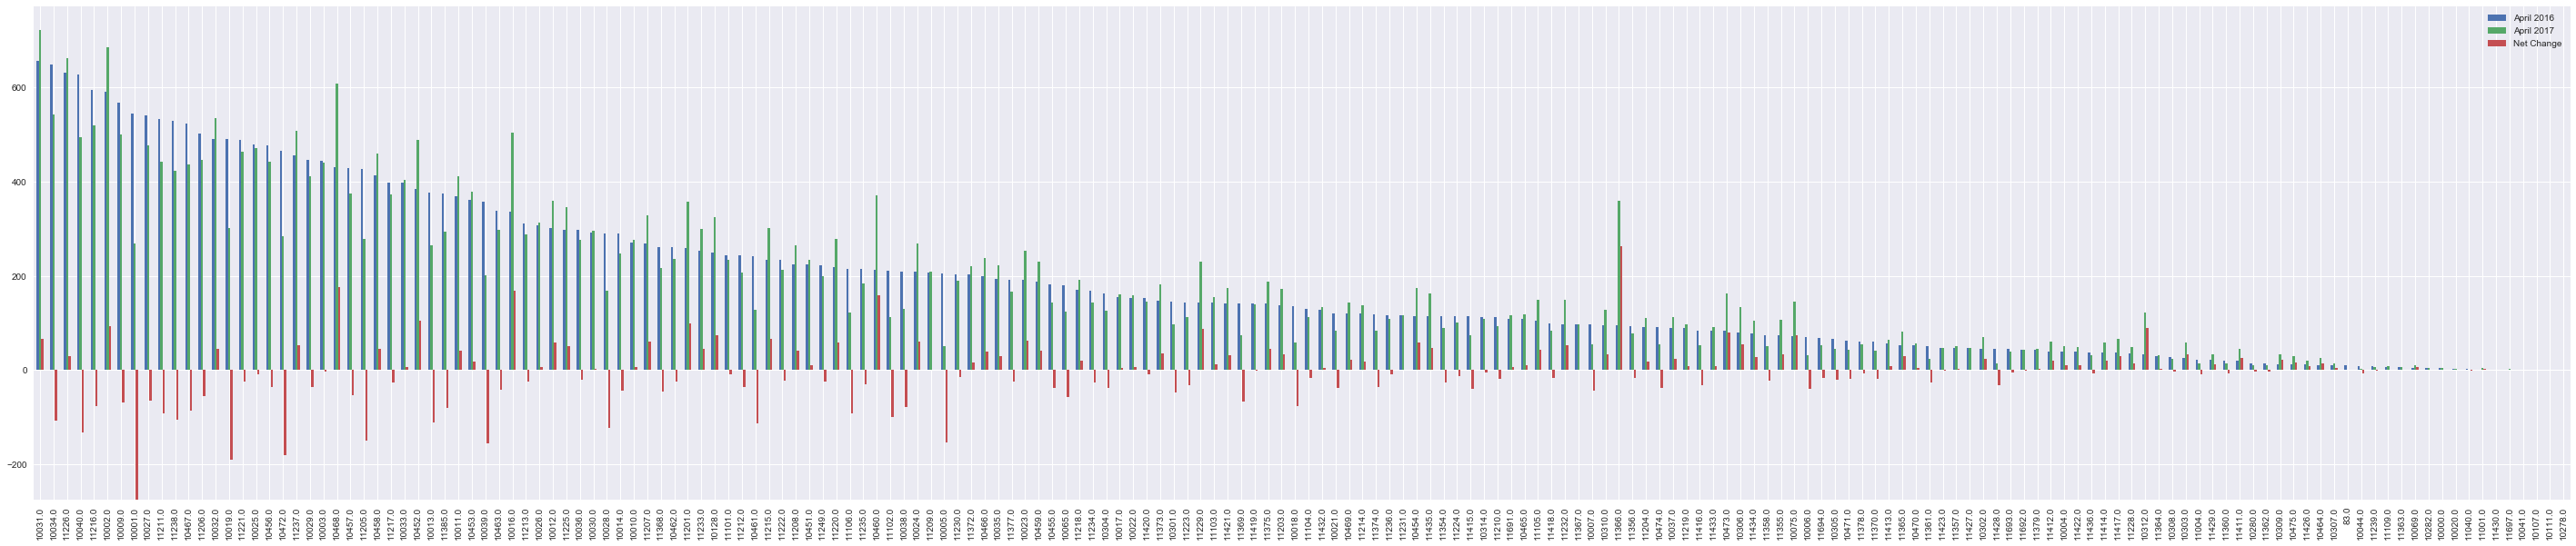

In [7]:
noiseByZip.plot.bar(fontsize=10,figsize= (50, 10))

The information is rather overwhelming in this form so lets narrow down to the top ten greatest drops of complaints over the last year.

In [8]:
noiseByZipDiff10 = noiseByZip.sort_values(by='Net Change', ascending=1)
noiseByZipDiff10 = noiseByZipDiff10.head(n=10)
noiseByZipDiff10

,April 2016,April 2017,Net Change
10001.0,545,269.0,-276.0
10019.0,491,301.0,-190.0
10472.0,466,285.0,-181.0
10039.0,358,202.0,-156.0
10005.0,205,51.0,-154.0
11205.0,427,278.0,-149.0
10040.0,628,495.0,-133.0
10028.0,291,168.0,-123.0
10461.0,241,128.0,-113.0
10013.0,378,266.0,-112.0


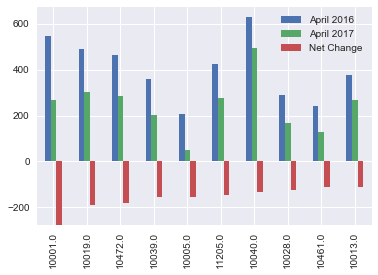

In [9]:
noiseByZipDiff10.plot.bar()

## Geolocation Based Analysis:

So to beter visualize the total complaints in zip codes, I entered the information into tableu:

##### Noise Complaints 2016:

![alt text](https://github.com/WilliamJCole/IS362_Final_Project/raw/master/Map-2016.png "Noise Complaints 2016")

##### Noise Complaints 2017:

![alt text](https://github.com/WilliamJCole/IS362_Final_Project/raw/master/Map-2017.png "Noise Complaints 2017")

##### Noise Complaints Change:

![alt text](https://github.com/WilliamJCole/IS362_Final_Project/raw/master/Map-Diff.png "Noise Complaints Compared")

### Conclusions:
